# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

previsao_renda_raw = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
previsao_renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
previsao_renda = previsao_renda_raw[['renda', 'posse_de_veiculo', 'posse_de_imovel']].copy()
total_renda = np.sum(previsao_renda['renda'])
previsao_renda['renda_pct'] = previsao_renda['renda'] / (total_renda - previsao_renda['renda'])
previsao_renda.head()

,renda,posse_de_veiculo,posse_de_imovel,renda_pct
0,3369.24,False,True,0.000049
1,6096.14,True,True,0.000088
2,5658.98,True,True,0.000082
3,7246.69,True,False,0.000104
4,4017.37,False,False,0.000058


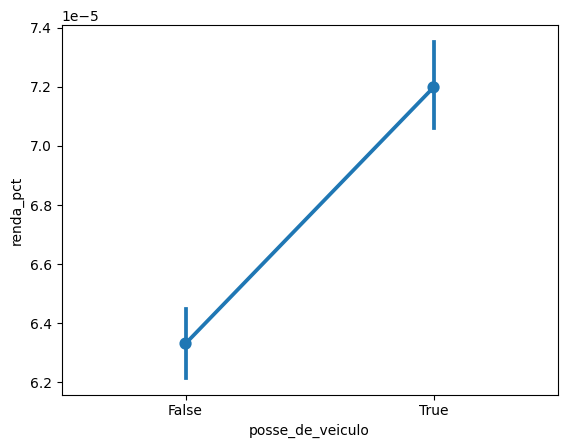

In [3]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda_pct",
                   data=previsao_renda, dodge=True, errorbar=('ci', 90))

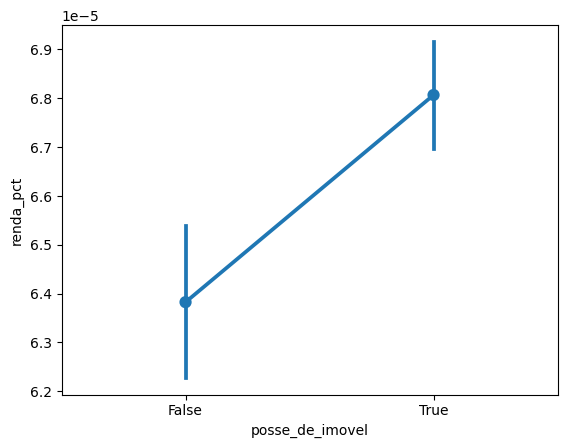

In [4]:
bx = sns.pointplot(x="posse_de_imovel", y="renda_pct",
                   data=previsao_renda, dodge=True, errorbar=('ci', 90))

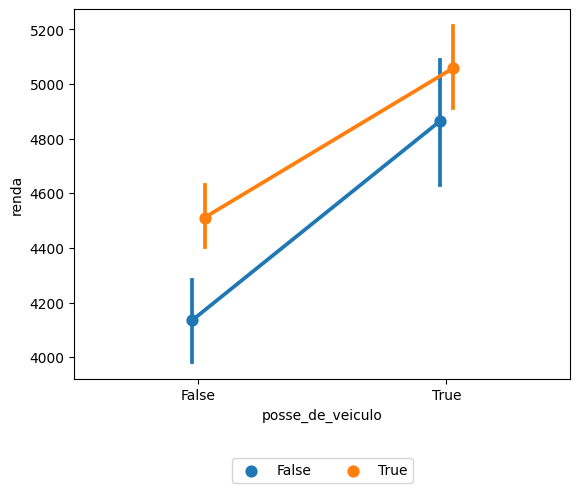

In [5]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda", hue = 'posse_de_imovel',
                   data=previsao_renda, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

Ambas variáveis qualitativas demonstram discriminar a renda pois veículos e imóveis possuem custo elevado e quanto maior a rendar, maior a possubilidade de possuir vículo ou imóvel.